# 0.0 Imports

In [3]:
import pandas as pd
import numpy  as np
import time

from sklearn    import cluster as ct
from sklearn    import metrics as mt
from sklearn    import cluster as c
from matplotlib import pyplot  as plt
from IPython    import display 

In [1]:
algorithm_list = ['K-means', 'Affinity Propagation']
clusters_list = []
avg_ss_list = []

# 1.0 Load Datasets

In [4]:
#Training Data
X = pd.read_csv('/home/priscilaportela/repos/fundamentos_ml/projeto_aluno/dataset/Cluster_X_dataset.csv' )

# 2.0 Machine Learning Modeling

## 2.1 K-means

### 2.1.1 Default Model

In [77]:
# Definir o algoritmo
kmeans_default = ct.KMeans(random_state=42)

#fit (training)
kmeans_default.fit( X )

# performance
labels = kmeans_default.labels_
n_clusters = max(labels)

#performance test
ss_avg = mt.silhouette_score( X, labels )

print( "For default hyperparameters: n_clusters = {} - Avg SS: {}".format( n_clusters, ss_avg) )

For default hyperparameters: n_clusters = 7 - Avg SS: 0.18820324123495782


### 2.1.1 Elbow Method

ClusterK: 2 - SS: 0.19158281546355227
ClusterK: 3 - SS: 0.23203128767253528
ClusterK: 4 - SS: 0.20453273556934934
ClusterK: 5 - SS: 0.2059092786455842
ClusterK: 6 - SS: 0.1657048699936025
ClusterK: 7 - SS: 0.16965396189807858
ClusterK: 8 - SS: 0.18820324123495782
ClusterK: 9 - SS: 0.15751834368969134
ClusterK: 10 - SS: 0.15793352457051552
ClusterK: 11 - SS: 0.17911960780131536
ClusterK: 12 - SS: 0.16658849509820886
ClusterK: 13 - SS: 0.15321568978975653
ClusterK: 14 - SS: 0.15198226861054234
ClusterK: 15 - SS: 0.1337574626980204
ClusterK: 16 - SS: 0.15989098364175344
ClusterK: 17 - SS: 0.1483172595875873
ClusterK: 18 - SS: 0.15187603020554813
ClusterK: 19 - SS: 0.16952532595809994


Text(0, 0.5, 'Silhouette Score Average')

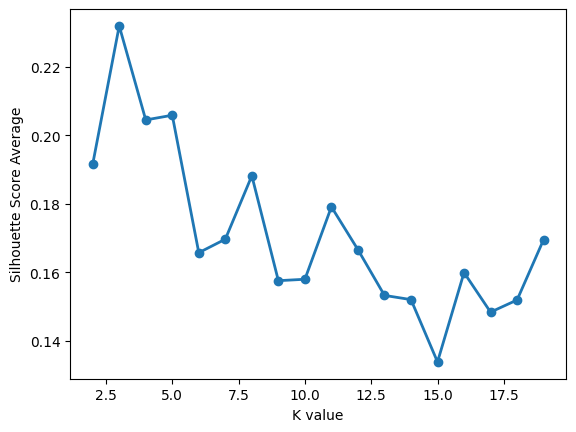

In [85]:
clusters = np.arange(2, 20, 1)
ss_list = []
for k in clusters:
    #Define
    model = ct.KMeans( n_clusters=k, random_state=42 )

    #Fit
    labels = model.fit_predict(X)
    
    #Performance
    SS = mt.silhouette_score(X, labels)
    ss_list.append(SS)
    print("ClusterK: {} - SS: {}".format(k, SS))
    
plt.plot( clusters, ss_list, marker="o", linewidth=2);
plt.xlabel( 'K value');
plt.ylabel( 'Silhouette Score Average')

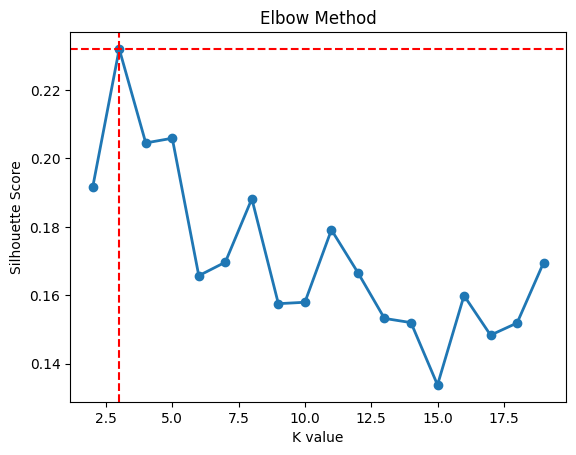

The best SS-Score: 0.23203128767253528, with k = 3


<Figure size 640x480 with 0 Axes>

In [99]:
max_ss = max(ss_list)
best_k = clusters[ss_list.index(max_ss)]

# Plot
plt.plot( clusters, ss_list, marker="o", linewidth=2);
# Plot
plt.title( 'Elbow Method' );
plt.xlabel( 'K value' );
plt.ylabel( 'Silhouette Score' )
plt.axhline(y=max_ss, color='r', linestyle='--')
plt.axvline(x=best_k, color='r', linestyle='--')
display.clear_output(wait=True)
plt.show()
plt.gcf()

print (f"The best SS-Score: {max_ss}, with n_clusters = {best_k}")

### 2.1.3 Model With Best Hyperparameter

In [5]:
n_clusters = 3

# Definir o algoritmo
kmeans = ct.KMeans(n_clusters=n_clusters, random_state=42 )

#fit (training)
kmeans.fit( X )

# performance
labels = kmeans.labels_

#performance test
ss_avg = mt.silhouette_score( X, labels )

print( "For n_clusters = {} - The Avg SS: {}".format( n_clusters, ss_avg) )

For n_clusters = 3 - The Avg SS: 0.23203128767253528


In [6]:
# Add values on the lists

clusters_list.append(n_clusters)
avg_ss_list.append(ss_avg)

## 2.2 Affinity Propagation

### 2.2.1 Default Model

In [65]:
model_default = c.AffinityPropagation( random_state=42)
model_default.fit( X )
labels = model_default.predict( X )
# Metric
ss = mt.silhouette_score( X, labels )
ss

0.1693882248493382

### 2.2.2 Fiding the best preference value

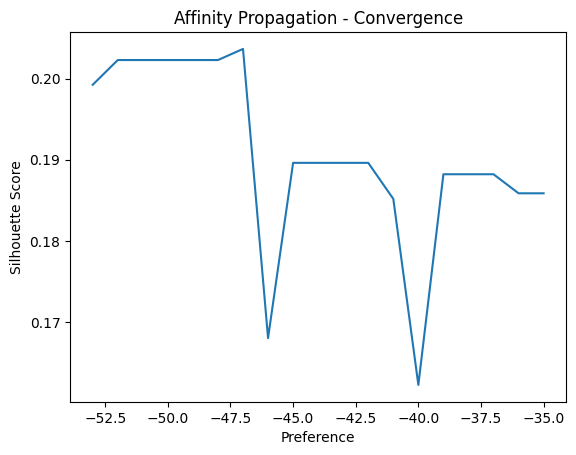

<Figure size 640x480 with 0 Axes>

In [52]:
# Convergency testing
p = np.arange( -35, -55, -1 )
ss_list = []
fig = plt.figure()

for i in range( len( p ) ):
    model = c.AffinityPropagation( preference=p[i] , random_state=42)
    model.fit( X )
    labels = model.predict( X )
    # Metric
    ss = mt.silhouette_score( X, labels )
    ss_list.append( ss )
    # Plot
    plt.plot( p[:i], ss_list[:i] )
    # Plot
    plt.title( 'Affinity Propagation - Convergence' );
    plt.xlabel( 'Preference' );
    plt.ylabel( 'Silhouette Score' )
    display.clear_output(wait=True)
    plt.show()
    plt.gcf()
    time.sleep(0.05)

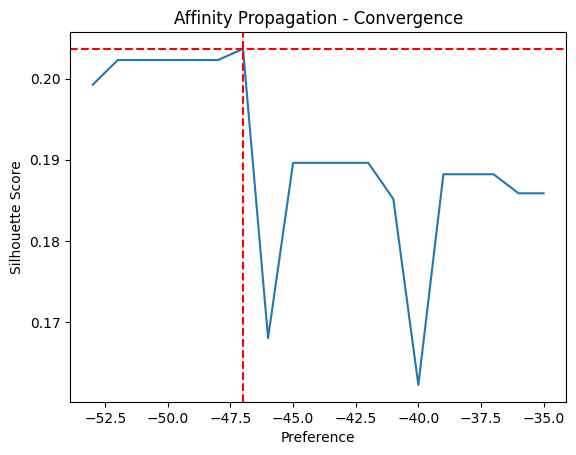

The best SS-Score: 0.20365750456597356, with preference= -47


<Figure size 640x480 with 0 Axes>

In [61]:
max_ss = max(ss_list)

best_pref = p[ss_list.index(max_ss)]

# Plot
plt.plot( p[:i], ss_list[:i] )
# Plot
plt.title( 'Affinity Propagation - Convergence' );
plt.xlabel( 'Preference' );
plt.ylabel( 'Silhouette Score' )
plt.axhline(y=max_ss, color='r', linestyle='--')
plt.axvline(x=best_pref, color='r', linestyle='--')
display.clear_output(wait=True)
plt.show()
plt.gcf()
time.sleep(0.05)

print (f"The best SS-Score: {max_ss}, with preference= {best_pref}")

### 2.2.3 Training Model With Best Hyperparameter

In [8]:
af_final = c.AffinityPropagation(preference=-47, random_state=42 )
af_final.fit(X)
labels = af_final.predict( X )

# Metric
ss = mt.silhouette_score( X, labels )

#performance test
ss_avg = mt.silhouette_score( X, labels )
n_clusters = max(labels)

print( "Number of clusters = {} - The Avg SS: {}".format( n_clusters, ss_avg) )


Number of clusters = 6 - The Avg SS: 0.20365750456597356


# Results

In [9]:
# Add values on the lists

clusters_list.append(n_clusters)
avg_ss_list.append(ss_avg)

In [10]:
# Add the performance values to the dataframes

performance_table = pd.DataFrame({ 
    'Algorithm': algorithm_list,
    'Clusters': clusters_list,
    'Average Silhouette-Score': avg_ss_list
})

In [11]:
performance_table

,Algorithm,Clusters,Average Silhouette-Score
0,K-means,3,0.232031
1,Affinity Propagation,6,0.203658
